PROBLEM STATEMENT:

Restaurants from all over the world can be found here in Bengaluru. From the United States to Japan, Russia to Antarctica, you get all types of cuisines here. Delivery, Dine-out, Pubs, Bars, Drinks, Buffet, Desserts you name it and Bengaluru has it. Bengaluru is the best place for foodies. The number of restaurants is increasing day by day. Currently, it stands at approximately 12,000 restaurants. With such a high number of restaurants. This industry hasn't been saturated yet. And new restaurants are opening every day. However, it has become difficult for them to compete with already established restaurants. The key issues that continue to pose a challenge to them include high real estate costs, rising food costs, shortage of quality manpower, fragmented supply chain, and over-licensing. This Zomato data aims at analyzing the demography of the location. Most importantly it will help new restaurants in deciding their theme, menus, cuisine, cost, etc for a particular location. It also aims at finding similarities between neighborhoods of Bengaluru on the basis of food. The dataset also contains reviews for each of the restaurants which will help in finding the overall rating for the place.


Aim:

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurants at different places in Bengaluru, the aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants open the industry hasn't been saturated yet and the demand is increasing day by day. In spite of increasing demand, it however has become difficult for new restaurants to compete with established restaurants. Most of them serve the same food. Bengaluru is the IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves.






DATASET DESCRIPTION:

Zomato is an Indian multinational restaurant aggregator and food delivery company founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus, and user reviews of restaurants as well as food delivery options from partner restaurants in select cities.





DATA DICTIONARY:


• Restaurant Id: Unique id of every restaurant across various cities of the world

• Restaurant Name: Name of the restaurant

• Country Code: Country in which restaurant is located

• City: City in which the restaurant is located

• Address: Address of the restaurant

• Locality: Location in the city

• Locality Verbose: Detailed description of the locality

• Longitude: Longitude coordinate of the restaurant's location

• Latitude: Latitude coordinate of the restaurant's location

• Cuisines: Cuisines offered by the restaurant

• Average Cost for two: Cost for two people in different currencies 

• Currency: Currency of the country

• Has Table booking: yes/no

• Has Online delivery: yes/ no

• Is delivering: yes/ no

• Switch to order menu: yes/no
• Price range: range of price of food

• Aggregate Rating: Average rating out of 5

• Rating color: depending upon the average rating color

• Rating text: text on the basis of rating of rating

• Votes: Number of ratings cast by people


<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1.Import libraries that you required and Load the data set.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_food= pd.DataFrame(pd.read_csv(r'Zomoto.CSV'))
df_food.head()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,14221,https://www.zomato.com/bangalore/shree-ranga-v...,"366, Hosur Main Road, Attibele, Anekal Taluk, ...",Shree Ranga Vilas,No,No,3.2/5,7,080 29765044,Electronic City,Casual Dining,NaN,"North Indian, South Indian, Chinese, Juices",500,"[('Rated 3.0', 'RATED\n Typical South Indian ...",[],Dine-out,Electronic City
1,43422,https://www.zomato.com/bangalore/sphyre-gatewa...,"Gateway Hotel, 66, Residency Road, Bangalore",Sphyre - Gateway Hotel,No,No,3.6 /5,45,+91 9886643495\n+91 9898780004,Residency Road,Lounge,NaN,Finger Food,"1,700","[('Rated 1.0', 'RATED\n Expected a good night...",[],Dine-out,MG Road
2,16032,https://www.zomato.com/bangalore/popular-baker...,"19, BDA Complex, HSR, Bangalore",Popular Bakery,No,No,3.7/5,36,+91 8105834605\r\n080 25722488,HSR,"Dessert Parlor, Bakery",NaN,"Desserts, Bakery",600,"[('Rated 5.0', ""RATED\n This outlet is in HSR...",[],Delivery,HSR
3,51635,https://www.zomato.com/bangalore/thai-chinese-...,"7, Anurhh Arcade, Hoodi Road, Kodigehalli Road...",Thai & Chinese Fast Food,No,No,3.4 /5,7,+91 9206260085\n+91 7619416923,KR Puram,Quick Bites,NaN,"Chinese, Thai",400,"[('Rated 5.0', 'RATED\n Its Looking delicious...",[],Dine-out,Whitefield
4,23424,https://www.zomato.com/bangalore/grill-on-whee...,"Kothanuru Main Road, Puttenahalli Road, Natara...",Grill On Wheels,No,No,NEW,0,+91 9901979901,JP Nagar,Quick Bites,NaN,"North Indian, Chinese, BBQ, Arabian, Fast Food",400,[],[],Dine-out,JP Nagar


In [6]:
#Dropping duplicate data
df_food=df_food.drop_duplicates()
#Dropping duplicate branches of the same restaurant.
df_food=df_food.drop_duplicates(['name', 'address'])
df_food.reset_index(drop=True, inplace=True) 
df_food.tail()

,Unnamed: 0,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
5934,40223,https://www.zomato.com/bangalore/sai-cafe-veg-...,"10th Cross, 2nd Temple Road, Malleswaram, Mall...",Sai Cafe Veg,No,No,3.5 /5,11,+91 9845055000,Malleshwaram,Quick Bites,NaN,Fast Food,250,"[('Rated 3.0', 'RATED\n Inspired by the no co...",[],Dine-out,Malleshwaram
5935,39718,https://www.zomato.com/bangalore/food-square-m...,"Big Bazaar, Linking Road, Malleshwaram, Bangalore",Food Square,Yes,No,3.2 /5,4,+91 9900249911\n+91 9900253311,Malleshwaram,Quick Bites,NaN,"Chinese, Street Food, Rolls",250,"[('Rated 1.0', 'RATED\n Not cooked properly')...","['Gobhi Manchurian', 'Veg Fried Rice', 'Veg No...",Delivery,Malleshwaram
5936,7444,https://www.zomato.com/bangalore/cheers-life-v...,"3rd Floor,Forum Neighborhood Mall, Varthur Mai...",Cheers Life,Yes,No,3.4/5,4,+91 7899802350,"Varthur Main Road, Whitefield",Kiosk,NaN,"Beverages, Juices",300,"[('Rated 4.0', 'RATED\n Located in the food c...","['Detox Smoothie', 'Blue Banana Smoothie', 'Aq...",Delivery,Brookefield
5937,7255,https://www.zomato.com/bangalore/caf%C3%A9-del...,"2, Purva Riviera Shopping Complex, Marathahall...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Delight,No,No,3.2/5,40,080 41114222\r\n+91 9880247269,Marathahalli,"Cafe, Quick Bites",NaN,"Cafe, Italian",400,"[('Rated 2.0', ""RATED\n So I ordered the egg ...",[],Delivery,Brookefield
5938,41541,https://www.zomato.com/bangalore/tbc-sky-loung...,"36/1, 5th Floor, Berry's Hotel Kadubeesanahall...",TBC- Sky Lounge,No,Yes,4.4 /5,619,080 42106712\n+91 7624959444,Marathahalli,"Casual Dining, Bar","Fish, Peri Peri Chicken, Cocktails, Chilli Chi...","Continental, Asian, Italian, North Indian","1,000","[('Rated 2.0', 'RATED\n The high rating on Zo...",[],Dine-out,Marathahalli


In [7]:
#Converting the rating from 'x/5' to x and convert into float.
df_food['rate']=df_food['rate'].str.split("/" , 1).str.get(0)
df_food['rate']=df_food['rate'].replace(to_replace= ['NAN', 'NEW', '-'], value=[np.nan,np.nan,np.nan])
df_food['rate']=df_food['rate'].astype("float")

C:\Users\viswa\AppData\Local\Temp\ipykernel_21336\4105756649.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df_food['rate']=df_food['rate'].str.split("/" , 1).str.get(0)


In [8]:
#Converting the cost from x,xxx to xxxx and convert into float
df_food['approx_cost(for two people)']=df_food['approx_cost(for two people)'].str.replace(',', '')
df_food['approx_cost(for two people)']=df_food['approx_cost(for two people)'].astype("float")

<Axes: >

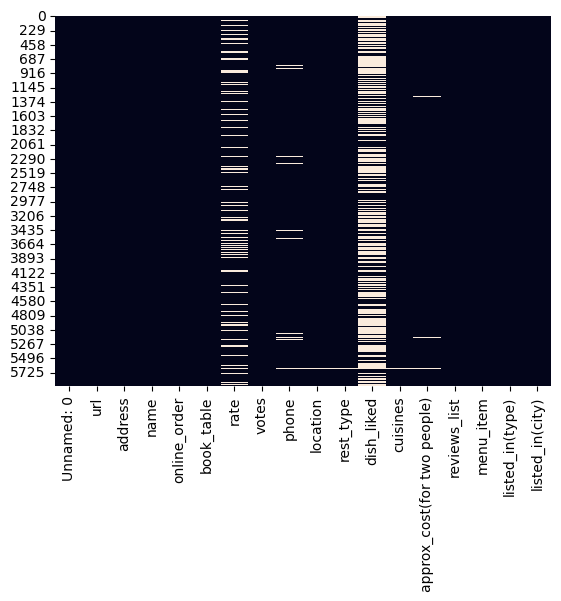

In [9]:
sns.heatmap(df_food.isnull(), cbar=False)

In [10]:
#There are a lot of missing values in rate column. They are not replaced with mean or median as they are new restaurants.
#The missing vales in rate are replaced with np.nan which excludes them from the analysis.

In [11]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5939 entries, 0 to 5938
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   5939 non-null   int64  
 1   url                          5939 non-null   object 
 2   address                      5939 non-null   object 
 3   name                         5939 non-null   object 
 4   online_order                 5939 non-null   object 
 5   book_table                   5939 non-null   object 
 6   rate                         4684 non-null   float64
 7   votes                        5939 non-null   int64  
 8   phone                        5797 non-null   object 
 9   location                     5936 non-null   object 
 10  rest_type                    5907 non-null   object 
 11  dish_liked                   2516 non-null   object 
 12  cuisines                     5934 non-null   object 
 13  approx_cost(for tw

In [12]:
df_food.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,5939.0,NaN,NaN,NaN,25859.657518,15309.60583,2.0,13304.0,25257.0,39881.0,51716.0
url,5939,5939,https://www.zomato.com/bangalore/shree-ranga-v...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,5939,5660,Delivery Only,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,5939,4738,Baskin Robbins,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_order,5939,2,Yes,3369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
book_table,5939,2,No,5365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rate,4684.0,NaN,NaN,NaN,3.667208,0.433077,2.1,3.4,3.7,4.0,4.9
votes,5939.0,NaN,NaN,NaN,233.113655,706.928536,0.0,5.0,34.0,161.0,14956.0
phone,5797,5435,080 43334321,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,5936,89,BTM,491,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2.	Which are the top restaurant chains based on the distribution(frequency) in Bangaluru?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [13]:
#Using pivot table, the number of branches of restaurants are found by aggregating name column by counting addresses.
#The results are sorted in a descending order and top 10 are displayed.
df_top=pd.pivot_table(data= df_food,values= 'address', index= 'name', aggfunc= 'count')
df_top= df_top.sort_values('address', ascending=False)
df_top.head(10)

,address
name,
Baskin Robbins,15
Cafe Coffee Day,14
KFC,13
Keventers,13
Sweet Truth,11
Petoo,11
McDonald's,11
Corner House Ice Cream,10
Polar Bear,10



<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3.	How many restaurants do not accept online orders?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
#Value counts is used to find the number of restaurants not accepting online order on the column 'online_order'
o=df_food['online_order'].value_counts()
print("The Number of resturants that do not accept online are",o['No'])

The Number of resturants that do not accept online are 2570



<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4.	What is the ratio b/w restaurants that provide and do not provide table booking?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
#Group by is used to find the number of restaurants that provide and don't provide table booking and ratio is found by division.
df_food.groupby('book_table')['name'].count()
table= df_food.groupby('book_table')['name'].count()
ratio= o['Yes']/ o['No']
print("The ratio b/w restaurants that provide and don't provide table booking is ",round(ratio,5))

The ratio b/w restaurants that provide and don't provide table booking is  1.31089


<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5.	Use a boxplot on the rating column. Use User Defined Function or Lambda function or Apply function to extract the data that comes before /. Kindly exclude /.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


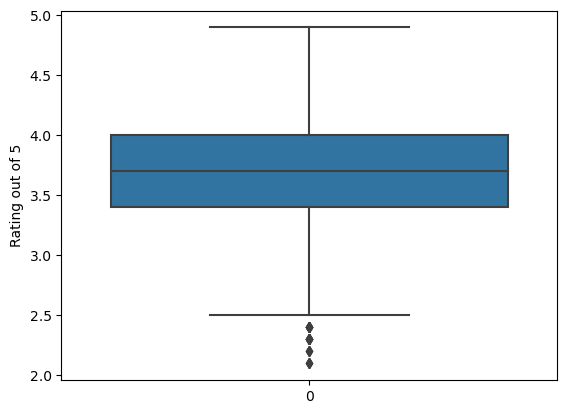

In [16]:
#sns.boxplot is used to find the distribution of rating.
sns.boxplot(df_food['rate'])
plt.ylabel("Rating out of 5")
plt.show()



<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.	Online and Offline orders restaurants percentage.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [17]:
#normalization is used to find the distribution of restaurants based on online order
online= df_food.online_order.value_counts(normalize=True)
ratio2= round(online['Yes']*100,2)
ratio3= round(online['No']*100,2)

print(ratio2,'% restaurants accept online orders where as \n', ratio3, '% restaurants do not accept online orders')


56.73 % restaurants accept online orders where as 
 43.27 % restaurants do not accept online orders


<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7.	 Plot the scatter plot using the Cost vs rating variable with respect to online order.  Use apply the function Or other function to remove the “,”.</b>
                </font>
            </div>
        </td>
    </tr>
</table>


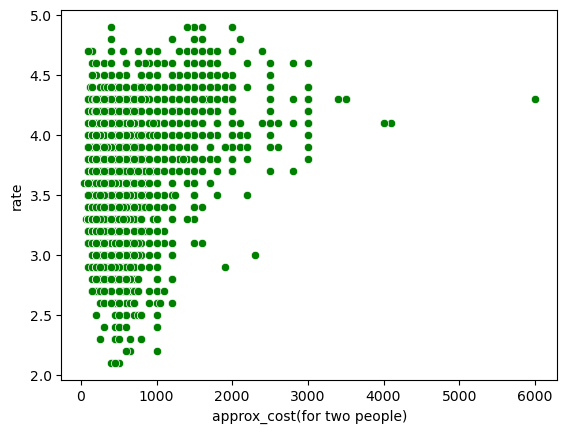

In [18]:
#Scatter plot is used to find the distribution of cost vs rate
sns.scatterplot(data= df_food, x= 'approx_cost(for two people)', y= 'rate', color='g')
plt.show()


<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8.	Find the distribution of the votes and Approx_cost using a user-defined function and for a loop.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [19]:
#A user defined function is created to count the values of each value of cost and rating which is passed through a list.
#This list os then run through a for loop to find the value of both.
def get_level_counts(i):
    print(df_food[i].value_counts())
a=['approx_cost(for two people)','rate']
for f in a:
    get_level_counts(f)

300.0     928
400.0     809
200.0     587
500.0     559
600.0     410
250.0     377
150.0     278
800.0     225
350.0     211
700.0     206
450.0     181
1000.0    149
100.0     126
1200.0     98
1500.0     96
650.0      92
550.0      84
900.0      80
750.0      80
1100.0     41
1400.0     40
1300.0     38
2000.0     35
1600.0     24
1800.0     21
1700.0     21
850.0      19
3000.0     15
2500.0     12
2200.0      7
1900.0      7
950.0       6
2100.0      5
2800.0      5
180.0       2
1350.0      2
120.0       2
3500.0      2
1250.0      2
70.0        2
2600.0      2
2400.0      2
199.0       1
469.0       1
4000.0      1
6000.0      1
1650.0      1
40.0        1
1050.0      1
130.0       1
1450.0      1
3400.0      1
4100.0      1
2300.0      1
80.0        1
Name: approx_cost(for two people), dtype: int64
3.7    461
3.9    434
3.8    422
3.6    394
4.0    365
3.5    332
3.4    300
4.1    296
3.3    285
3.2    236
4.2    207
3.1    185
4.3    149
3.0    128
4.4    114
2.9     92
2.8   




<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9.	Which are the most common restaurant type in Banglore?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
#Pivot table is used to group the restaurants based on type of restaurant.
df_type= pd.pivot_table(data= df_food, values='name', index='rest_type', aggfunc='count')
df_type= df_type.sort_values('name', ascending=False).head(10)
df_type

,name
rest_type,
Quick Bites,2315
Casual Dining,1137
Delivery,356
Cafe,333
"Takeaway, Delivery",297
Dessert Parlor,275
Bakery,143
Beverage Shop,103
"Casual Dining, Bar",97



<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10.	Is there any difference b/w the votes of restaurants accepting and not accepting online orders?</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [21]:
#The restaurants are goruped by online orders and average of rating is found.
#If the averages differ by more than 10%, a significant difference is observed. Or else there is no much difference
print("The average rating of restaurants accepting and not accepting online orders are")
r=df_food.groupby('online_order')['rate'].mean()
print(r)

if r['No']<0.9*r['Yes'] or r['No']>1.1*r['Yes']:
    print("There is a significant difference between the votes")
else:
    print("There is no significant difference between the votes")

The average rating of restaurants accepting and not accepting online orders are
online_order
No     3.632297
Yes    3.686587
Name: rate, dtype: float64
There is no significant difference between the votes



<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11.	Which are the most common restaurant type in Banglore?</b>
                </font>
            </div>
        </td>
    </tr>
</table>


In [31]:
#Pivot table is used to group the restaurants based on type of restaurant.
df_type= pd.pivot_table(data= df_food, values='name', index='rest_type', aggfunc='count')
df_type= df_type.sort_values('name', ascending=False).head()
df_type

,name
rest_type,
Quick Bites,2315
Casual Dining,1137
Delivery,356
Cafe,333
"Takeaway, Delivery",297




<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12.	Find the Best budget Restaurants in any location.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
#The restaurants are sorted in ascending order of rate and then the location duplicates are dropped to find out minimum cost in each area.
df_budget=df_food[['location','name','approx_cost(for two people)']]
df_budget=df_budget.sort_values('approx_cost(for two people)')
df_budget=df_budget.drop_duplicates('location').head(10)
df_budget

,location,name,approx_cost(for two people)
3250,Domlur,Srinidhi Sagar Deluxe,40.0
4914,BTM,Namaste,70.0
5895,JP Nagar,Lassi Shop,80.0
664,Basavanagudi,Great Indian Rolls,100.0
4809,Brigade Road,Juice Magic,100.0
669,Koramangala 1st Block,Chaiwala,100.0
1949,Koramangala 5th Block,Sky Juice Corner,100.0
3835,Bannerghatta Road,SLV Kabab Centre,100.0
5639,Shivajinagar,JCL Canteen,100.0
1354,Sarjapur Road,Mangala Hotel,100.0




<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13.	Top quick bites restaurant chains in Banglore.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
#Quick bites restaurants are filtered and sorted on the descending order of rating
df_QB= df_food[df_food.rest_type=='Quick Bites']
df_QB= df_QB.sort_values('rate', ascending=False)
df_QB[['name', 'location', 'rate']].head()

,name,location,rate
4602,Taaza Thindi,Banashankari,4.7
4085,CTR,Malleshwaram,4.7
5134,Chikkanna Tiffin Room,City Market,4.5
5526,Veena Stores,Malleshwaram,4.5
5492,Malleshwaram Dosa Corner,Malleshwaram,4.4



<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14.	Which are the most popular casual dining restaurant chains, Make use of any plot related to this question?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

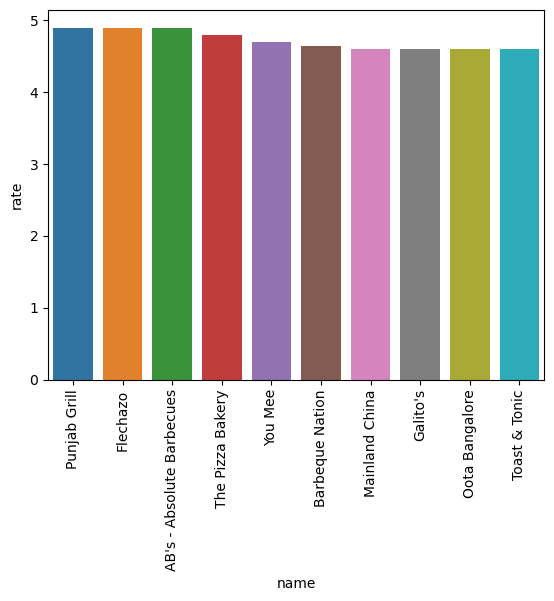

In [25]:
#Casual dining restaurants are filtered. Pivot table is used to find the average rating of each restaurants and it is plotted.
df_CD= df_food[df_food.rest_type=='Casual Dining']
CD=pd.pivot_table(data=df_CD,values='rate',index='name',aggfunc='mean')
CD=CD.reset_index()
CD= CD.sort_values('rate', ascending=False).head(10)
sns.barplot(data=CD,x='name',y='rate')
plt.xticks(rotation=90)
plt.show()




<table align="left">
    <tr>
        <td width="6%">
        <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15.	Which are the most popular cuisines of Bangalore using a related plot?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [87]:
df_cuisines=df_food[['cuisines', 'rate']]
df_cuisines=df_cuisines['cuisines'].str.split(',', expand=True)
df_cuisines['rate']=df_food['rate']

In [88]:
df_cuisines=df_cuisines.melt(id_vars='rate', value_vars= [0,1,2,3,4,5,6,7])
df_cuisines.head()

,rate,variable,value
0,3.2,0,North Indian
1,3.6,0,Finger Food
2,3.7,0,Desserts
3,3.4,0,Chinese
4,NaN,0,North Indian


In [89]:
df_cuisines=df_cuisines.drop(['variable'], axis=1)
df_cuisines.dropna(subset='value', inplace=True)
df_cuisines.tail()

,rate,value
45789,NaN,Kerala
45924,4.5,Pizza
46557,3.2,Burger
46762,NaN,Fast Food
47431,3.1,Andhra


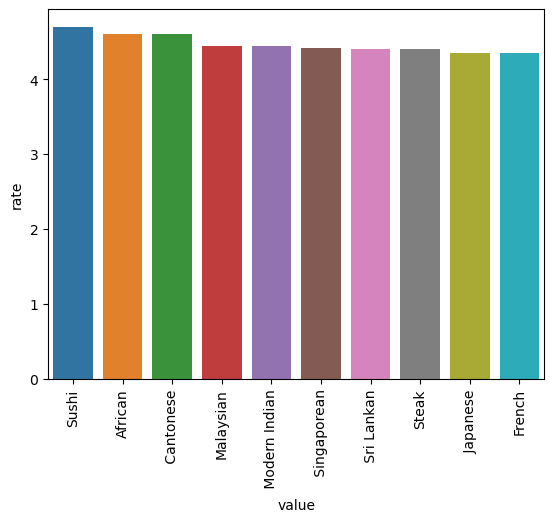

In [92]:
C=pd.pivot_table(data=df_cuisines,values='rate',index='value',aggfunc='mean')
C=C.reset_index()
C= C.sort_values('rate', ascending=False).head(10)
sns.barplot(data=C,x='value',y='rate')
plt.xticks(rotation=90)
plt.show()